#**Lab 1**
##**Basic python syntax**

Source https://lobsterdata.com/info/DataSamples.php

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

**os** - Miscellaneous operating system interfaces 

**pandas** - Python data structures and data analysis tools

**numpy** - python fundamental package for scientific computing

**matlplotlib** - python 2D plotting library

**datetime** - supplies calsses for manipulating dates and times

In [0]:
os.chdir("/content/drive/My Drive/Colab Notebooks") #set directory

#import files
orderbook = "GOOG_2012-06-21_34200000_57600000_orderbook_10.csv"
message = "GOOG_2012-06-21_34200000_57600000_message_10.csv"

#import files
df_message = pd.read_csv(message,usecols = [0,1,3,4,5], 
                         names=['time', 'type','size','price','direction'])

##**Tick Level Statistics**

In [0]:
#inspecting the data set
df_message.head() #show the first five rows of the data

#pandas replacement for python datetime.datatime object
df_message.index = pd.Timestamp(datetime.date.today()) + pd.TimedeltaIndex(df_message.time, unit='s')

#saving csv file to directory
df_message.to_csv("tick.csv")

In [118]:
df_message

,time,type,size,price,direction
2020-01-16 09:30:00.015105074,34200.015105,4,4,5794000,1
2020-01-16 09:30:00.059901970,34200.059902,4,300,5794000,1
2020-01-16 09:30:00.113246707,34200.113247,5,1,5795100,1
2020-01-16 09:30:00.113246707,34200.113247,5,1,5795000,1
2020-01-16 09:30:00.113246707,34200.113247,5,1,5794900,1
...,...,...,...,...,...
2020-01-16 15:59:59.544131783,57599.544132,1,300,5655600,-1
2020-01-16 15:59:59.544132627,57599.544133,1,200,5655600,-1
2020-01-16 15:59:59.544133264,57599.544133,1,300,5655600,-1
2020-01-16 15:59:59.582154048,57599.582154,3,100,5649700,1


In [93]:
#inspecting the data set
df_message.head() #show the first five rows of the data

,time,type,size,price,direction
2020-01-16 09:30:00.015105074,34200.015105,4,4,5794000,1
2020-01-16 09:30:00.059901970,34200.059902,4,300,5794000,1
2020-01-16 09:30:00.113246707,34200.113247,5,1,5795100,1
2020-01-16 09:30:00.113246707,34200.113247,5,1,5795000,1
2020-01-16 09:30:00.113246707,34200.113247,5,1,5794900,1


In [95]:
#On order type: order to trade ratio: 10:1
df_message.groupby("type").count()[["time"]]

,time
type,
1,71258
2,19
3,64961
4,7765
5,3913


In [96]:
#Orders by minutes
df_message.groupby("type").count()[["time"]]/6.5/60

,time
type,
1,182.712821
2,0.048718
3,166.566667
4,19.910256
5,10.033333


In [97]:
#limit order dynamics
df_lo = df_message[df_message["type"] == 1]

#total number and volume of trades per direction
df_lo.groupby("direction").agg({"time":"count","size":"sum"}).rename(columns={"time":"count"})

,count,size
direction,,
-1,37136,2174762
1,34122,2345778


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


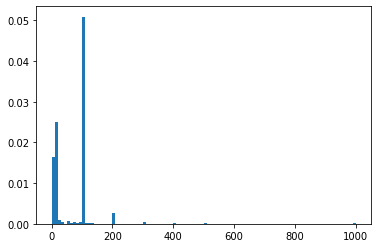

In [100]:
#limit bid (buy) order
df_lo_bid = df_lo[df_lo["direction"] == 1]
plt.hist(df_lo_bid["size"], 100, normed = True, range = [0, 1000])
plt.show()

In [101]:
#summary statistics of bid orders
df_lo_bid.describe()[["size"]]

,size
count,34122.000000
mean,68.746791
std,74.427158
min,1.000000
25%,10.000000
50%,100.000000
75%,100.000000
max,2000.000000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


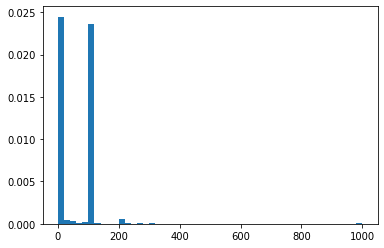

In [102]:
#orders distribution by direction
df_lo_ask = df_lo[df_lo['direction'] == -1]
plt.hist(df_lo_ask['size'], 50, normed = True, range = [0,1000])
plt.show()

In [103]:
#summary statistics of ask order
df_lo_ask.describe()[["size"]]

,size
count,37136.000000
mean,58.562096
std,69.253200
min,1.000000
25%,10.000000
50%,41.000000
75%,100.000000
max,2300.000000


##**Trades**

In [0]:
df_trade = df_message[(df_message['type'] == 4) | (df_message['type'] == 5)] #import type 4 and 5
df_trade.to_csv('trade.csv') #write into csv format

In [105]:
#first 5 row of the data set
df_trade.head()

,time,type,size,price,direction
2020-01-16 09:30:00.015105074,34200.015105,4,4,5794000,1
2020-01-16 09:30:00.059901970,34200.059902,4,300,5794000,1
2020-01-16 09:30:00.113246707,34200.113247,5,1,5795100,1
2020-01-16 09:30:00.113246707,34200.113247,5,1,5795000,1
2020-01-16 09:30:00.113246707,34200.113247,5,1,5794900,1


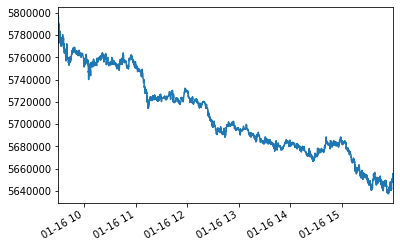

In [107]:
#plot price with respect to time
(df_trade['price']).plot() #adjustment
plt.show()

In [109]:
#calculate and add returns to the dataframe
df_trade['return'] = (df_trade['price'].shift(-1)) - (df_trade['price']) #shift

#remove missing data
df_trade.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [110]:
#calculate autocorrelation
df_trade['return'].autocorr()

-0.07997926904601227

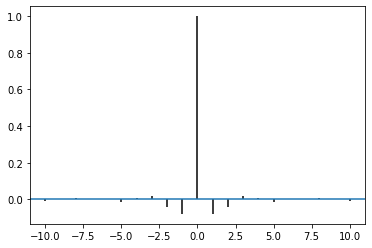

In [111]:
#plot autocorrelation of return
plt.acorr(df_trade['return'])
plt.show()

In [112]:
#total time and size of trade per direction 
df_trade.groupby("direction").agg({"time":"count", "size":"sum"})

,time,size
direction,,
-1,5808,354732
1,5869,351293


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


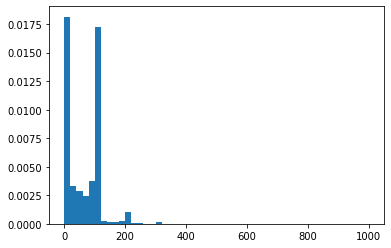

In [113]:
#bid distribtuion
df_trade_bid = df_trade[df_trade["direction"] == -1]
plt.hist(df_trade_bid["size"], 50, normed = True, range = [0, 1000])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


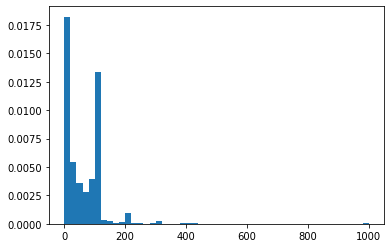

In [114]:
#ask distribtuion
df_trade_ask = df_trade[df_trade['direction'] == 1]
plt.hist(df_trade_ask['size'], 50, normed=True, range=[0, 1000])
plt.show()

##**Re-Sampling**

In [0]:
#resampling generates a unique sampling distribution on the basis of actual data
message1m = df_message.resample('1min').last()
message1m.to_csv('1min.csv') #write csv

In [0]:
#calculate log return
message1m['logreturn'] = np.log(message1m['price'].shift(-1)) - np.log(message1m['price'])

#calcualte return
message1m['return'] = (message1m['price'].shift(-1)) - (message1m['price'])

#remove missing data
message1m.dropna(inplace=True) 

In [117]:
#last 5 row of the dataframe
message1m.tail()

,time,type,size,price,direction,logreturn,return
2020-01-16 15:54:00,57299.760336,1,4,5639100,1,0.000089,500.0
2020-01-16 15:55:00,57359.397065,3,100,5639600,1,0.000886,5000.0
2020-01-16 15:56:00,57419.787423,1,7,5644600,-1,-0.000656,-3700.0
2020-01-16 15:57:00,57479.232971,1,100,5640900,1,0.001665,9400.0
2020-01-16 15:58:00,57539.724502,1,100,5650300,-1,0.000831,4700.0


In [0]:
def trade_sample(df_message = df_message, freq='1MIN'):
    trade_sampled = df_message.resample(freq).last()
    trade_sampled['logreturn'] = np.log(trade_sampled['price'].shift(-1)) - np.log(trade_sampled['price'])
    trade_sampled['return'] = (trade_sampled['price'].shift(-1)) - (trade_sampled['price'])
    trade_sampled.dropna(inplace=True)
    return trade_sampled 

In [120]:
#computation of standard deviation
trade_sample(freq='4MIN')['return'].std()

5935.592522323724

In [121]:
trade_sample(freq='81MIN')['return'].std()

20301.6214459174

In [122]:
trade_sample(freq='1MIN')['return'].std()

5378.845890300252

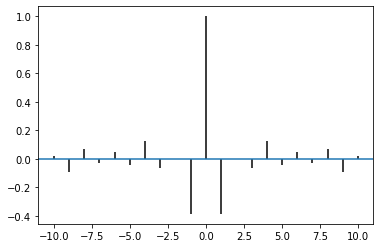

In [123]:
#autocorrelation plot for returns
plt.acorr(trade_sample(freq='1MIN')['return'])
plt.show()

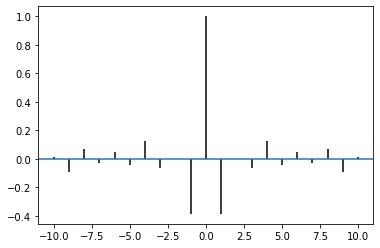

In [124]:
#autocorrelation plot for returns
plt.acorr(trade_sample(freq='1MIN')['logreturn'])
plt.show()